<h2 style="display: flex; justify-content: space-between; align-items: center;">
    <span>Exercise 1</span>
    <span>Date: 18/12/2024</span>
</h2>

<h2 style="text-align:center;">Decision Trees - Online Shoppers Purchasing Intention </h2>

### <ins>**Aim:**</ins> To build a Decision Tree Classifier model to predict customer behavior based on the features of online shoppers, specifically predicting whether a visitor will make a purchase or not.

### <ins>**Algorithm:**</ins>

The Decision Tree algorithm selects the best feature to split the data at each node by using criteria like Gini impurity or entropy for classification tasks. It splits the data such that the resulting subsets have the highest possible homogeneity of the target variable.

The splitting criterion for each feature is based on the Gini Index or Information Gain:

Gini Index measures the impurity of a dataset. The Gini impurity of a node is calculated as:

$$
Gini(t) = 1 - \sum_{i=1}^{k} p_i^2
$$

Where $( p_i)$ is the proportion of items in class $(i)$ at node $(t)$.

Entropy measures the disorder or uncertainty in the dataset. It is used in the Information Gain formula, which is computed as:

$$
Information\ Gain = Entropy(Parent) - \sum_{i=1}^{k} \frac{|Subset_i|}{|Parent|} \cdot Entropy(Subset_i)
$$


Step 1: Import Libraries  
- Import necessary Python libraries that will be used for data manipulation, building the model, and visualizing the results.

Step 2: Load the Dataset  
- Load the dataset using pandas `read_csv` function to read the "online_shoppers_intention.csv" file into a DataFrame.

Step 3: Check the Data  
- Check the general structure of the dataset using `df.info()` to understand the number of records, data types, and non-null counts.

Step 4: Handle Missing Values  
- Check for any missing values in the dataset using `df.isna().sum()` to identify columns with null values.

Step 5: Analyze Target Variable  
- Investigate the distribution of the target variable (`Revenue`) to see if it is balanced or imbalanced.

Step 6: Split the Features and Target  
- Separate the features (`X`) and the target variable (`y`). The target variable here is `Revenue`, which indicates whether the customer made a purchase (1) or not (0).

Step 7: Encode Categorical Variables  
- Use `LabelEncoder` to encode categorical variables (e.g., `Month` and `VisitorType`) into numerical values as Decision Trees require numerical input.

Step 8: Train the Decision Tree Classifier  
- Initialize and train a `DecisionTreeClassifier`. Set a maximum depth of 4 to prevent overfitting.

Step 9: Visualize the Decision Tree  
- Plot the decision tree to visualize how it makes decisions based on the features. Set appropriate sizes for better visualization.

Step 10: Split Data for Model Evaluation  
- Split the dataset into training and testing sets (80% train, 20% test) using `train_test_split`.

Step 11: Fit the Model to Training Data  
- Fit the Decision Tree model on the training data.

Step 12: Make Predictions  
- Use the trained model to predict the target variable on the test dataset.

Step 13: Evaluate the Model  
- Evaluate the model's performance using various classification metrics like accuracy, precision, recall, F1-score, confusion matrix, and classification report.


### Import the libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

### Load the Dataset

In [4]:
df = pd.read_csv("../online_shoppers_intention.csv")

In [5]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Check for null values

In [7]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Check target values

In [8]:
df.Revenue.value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

### Split features and target

In [9]:
y = df[['Revenue']]
y

,Revenue
0,False
1,False
2,False
3,False
4,False
...,...
12325,False
12326,False
12327,False
12328,False


In [10]:
X=df.drop(columns=['Revenue'])
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False


### Encode categorical variables

In [11]:
enc = LabelEncoder()
X['Month'] = enc.fit_transform(X['Month'])
X['VisitorType'] = enc.fit_transform(X['VisitorType'])
y['Revenue'] = enc.fit_transform(y['Revenue'])

### Apply Decision Tree Classifier

In [12]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)

In [13]:
clf.fit(X,y)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [14]:
classNames = enc.classes_.astype(str)

### Plot the tree

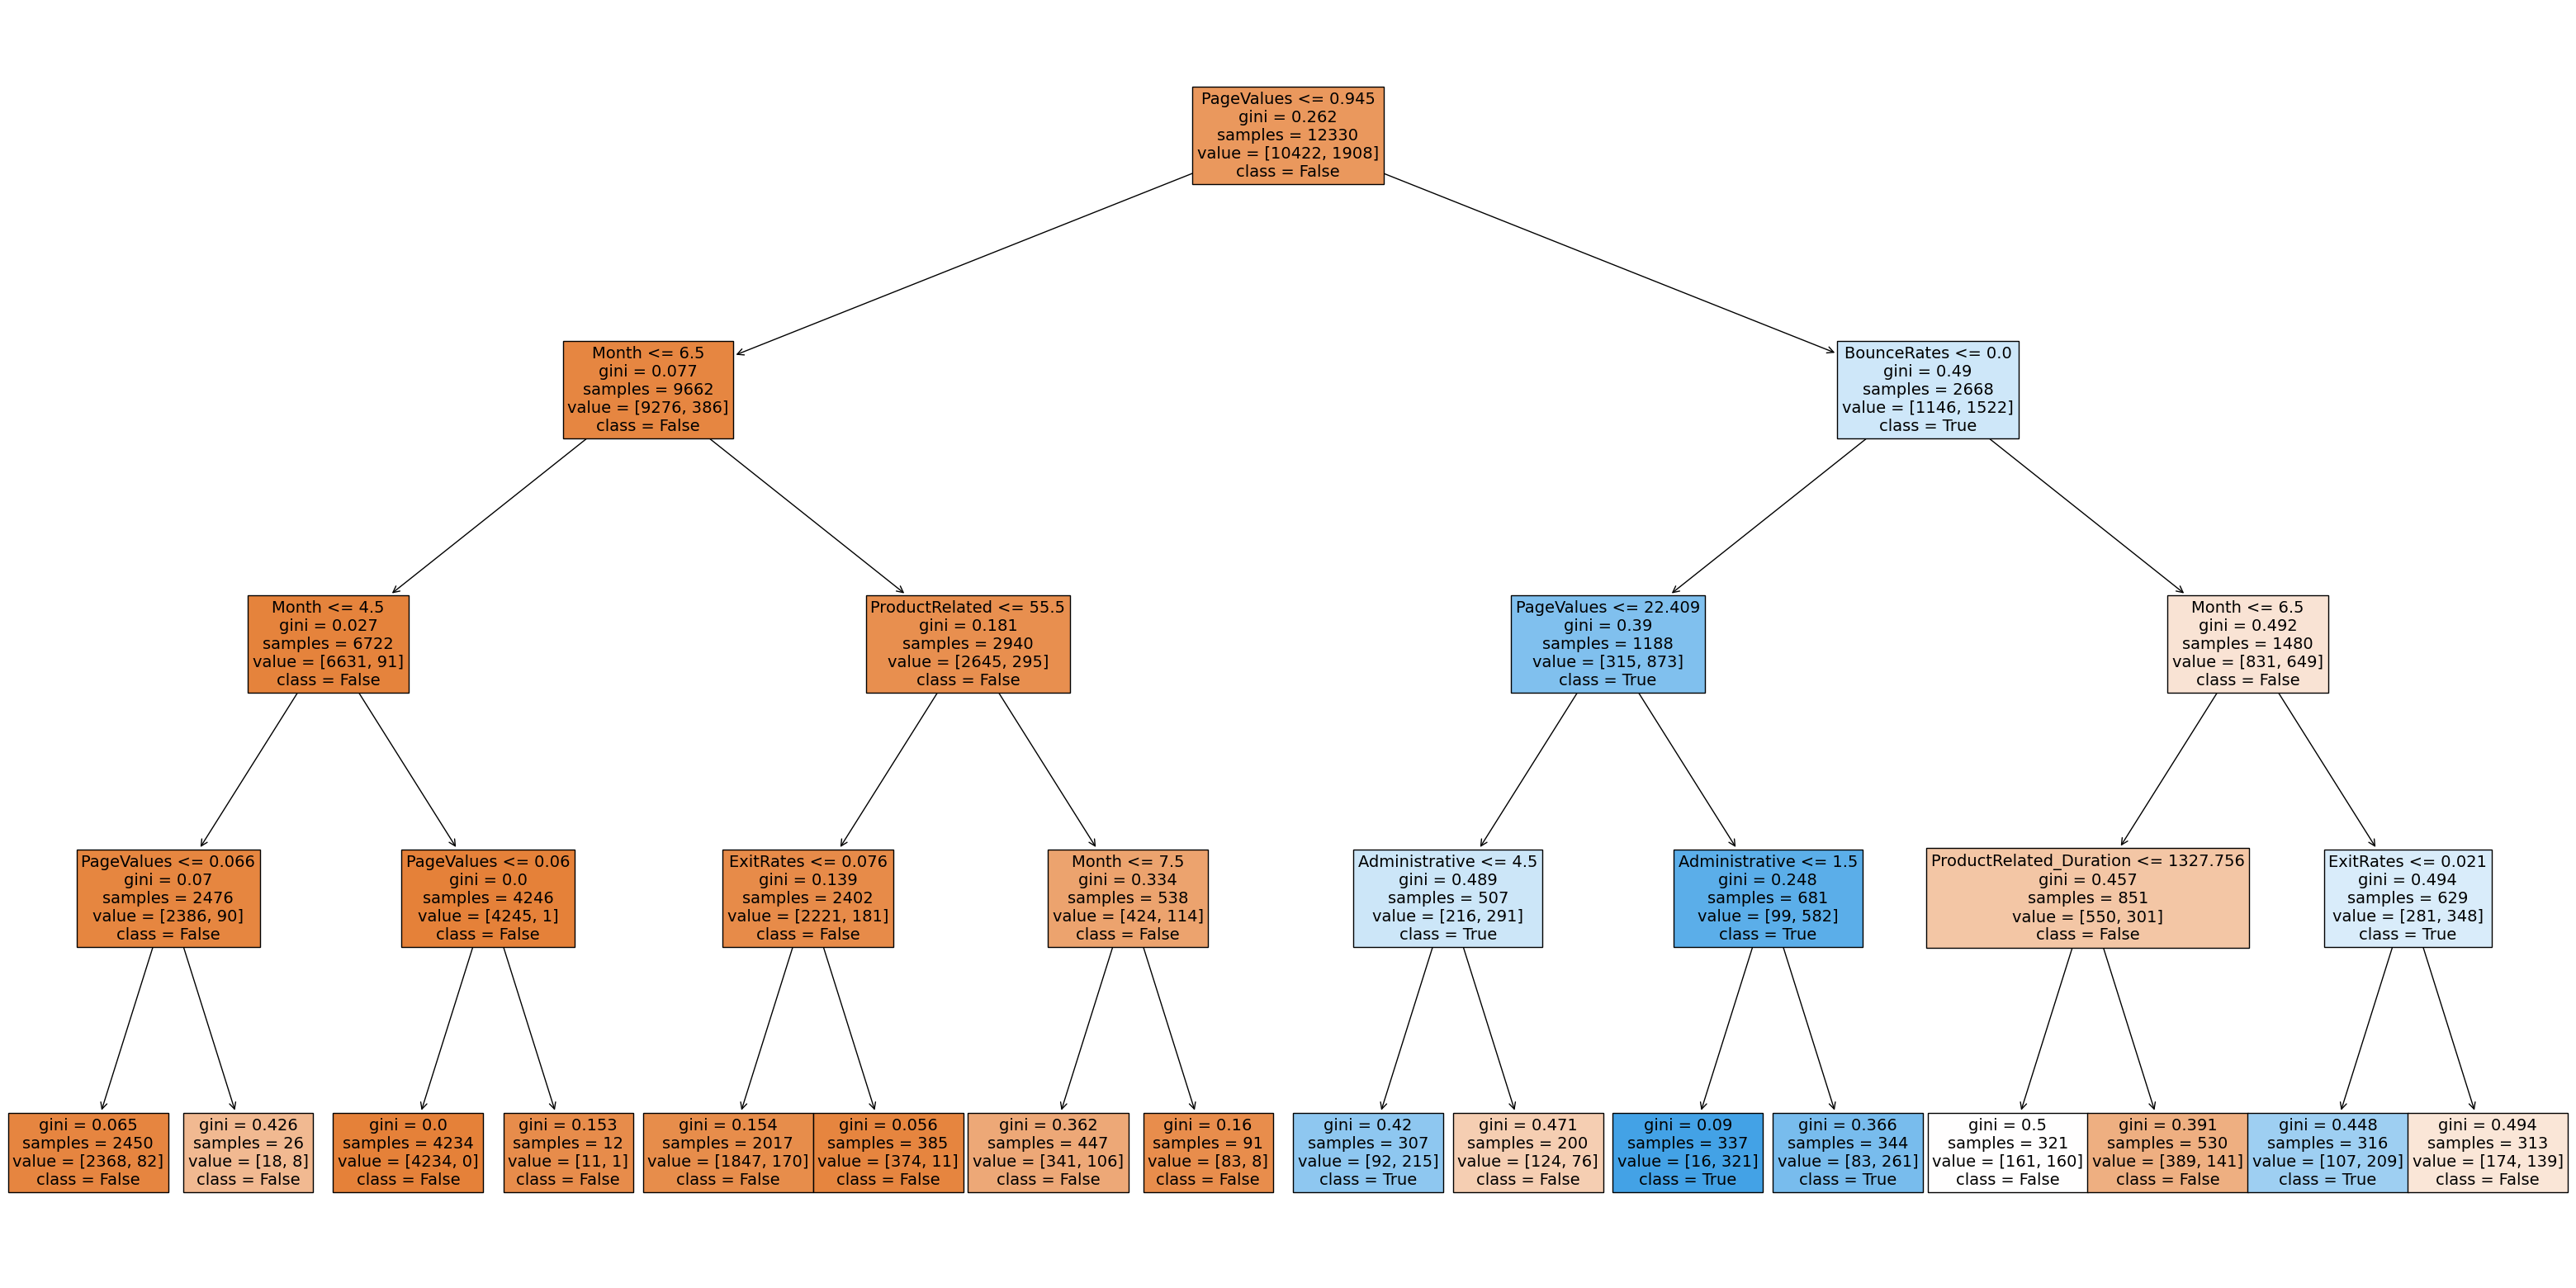

In [15]:
plt.figure(figsize=(40,20))
plot_tree(clf, feature_names=X.columns, class_names=classNames, filled=True, fontsize=14)
plt.show()

### Performance metrics

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [20]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8885
Precision: 0.7036
Recall: 0.5718
F1 Score: 0.6309

Confusion Matrix:
[[1956   99]
 [ 176  235]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2055
           1       0.70      0.57      0.63       411

    accuracy                           0.89      2466
   macro avg       0.81      0.76      0.78      2466
weighted avg       0.88      0.89      0.88      2466



### Result

A Decision Tree Classifier was built to predict whether online shop visitors will turn into payinig customer with an accuracy of 88.85%

---